<a href="https://colab.research.google.com/github/FariusGitHub/DataScience/blob/master/joblib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# INITIATE IMPORTANT LIBRARIES
import pandas as pd
from sklearn import model_selection
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# IMPORT THE DATASET
data=pd.read_csv('https://weclouddata.s3.amazonaws.com/datasets/bootcamp/final_ml_challenge_fraud/sample.csv')

In [ ]:
# X=data.drop(['y'], axis=1)      # Assign first 100 columns features into X

X=data[['x0', 'x1', 'x2', 'x3', 'x4']]

y=data['y']                     # Assign The final column (label) into y
print('length of X', len(X))    # Printing the length of X data frame
print('length of y', len(y))    # Printing the length of y data series
print(data['y'].value_counts()) # Printing simple EDA : imbalanced y label.
data                            # Showing original downloaded file sample.csv

length of X 8000
length of y 8000
0    7561
1     439
Name: y, dtype: int64


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,-0.247824,6.425853,-6.485658,-8.241462,NaN,0.03%,Tuesday,-9.808905,4.753455,2.537819,...,0.592543,14.967527,6.691044,-0.275572,2.518542,4.637431,-14.296510,1.898115,-1.225228,0
1,2.623274,-2.808263,5.321746,-2.437653,0.614041,0.02%,Wednesday,10.710053,1.608882,-2.027541,...,-1.712788,-3.638637,-2.256492,2.703101,1.760729,2.660614,1.182922,-3.203078,0.711018,0
2,-5.460551,5.997701,-4.614194,-6.035128,-1.986438,-0.0%,Tuesday,-3.364649,-2.493473,1.429913,...,2.206956,7.292558,10.095556,1.601155,1.710645,-12.519434,-5.261707,2.032666,-6.445528,0
3,1.566307,-0.080517,0.064754,6.063193,-2.253075,0.0%,Thurday,-6.111982,-1.796377,-3.169510,...,-3.841669,5.189840,10.291069,-3.642396,0.674300,-1.104317,-3.922342,-0.613947,7.275179,0
4,0.750715,15.656095,-6.778600,11.251037,-0.308200,0.0%,Wednesday,2.498892,-0.323229,-2.624680,...,8.933781,-7.295794,-11.246059,-4.876594,3.395415,-2.646844,-5.273267,-5.259536,-3.240523,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-2.664967,-3.427965,-5.143886,0.289251,-3.202695,0.01%,Tuesday,-13.356218,0.244953,-2.524016,...,2.123462,6.139848,-4.323045,-6.453976,6.345870,6.482477,-11.562510,4.216840,5.689256,0
7996,2.174302,-4.912113,-4.803975,-22.081911,NaN,0.0%,Tuesday,-0.266593,-1.743051,5.870177,...,-12.307131,-4.762671,10.574798,-3.954958,0.998331,9.001036,1.171144,-1.001999,9.383899,0
7997,2.247079,-3.377818,-1.567924,-7.445187,-0.677291,-0.01%,Wednesday,6.618001,2.323299,3.724704,...,-8.084817,8.031024,7.282587,2.439789,1.666460,0.566402,3.591239,2.962485,0.980093,0
7998,-1.402385,-20.117766,3.705099,11.634801,0.680733,-0.0%,Tuesday,-4.304220,-1.730289,-12.788627,...,4.920424,-0.954106,6.261179,0.628781,-0.109908,2.086040,12.889705,7.359320,0.124861,0


In [ ]:
X_training, X_testing, y_training, y_testing =\
     model_selection.train_test_split(\
     X, y, test_size=0.20, random_state=42)           # Splitting X,y into X_train, y_train and X_test, y_test

print('length of X_train before ROS', len(X_training))  
print('length of y_train before ROS', len(y_training)) 
print(y_training.value_counts())                         # Displaying imbalanced composition of label 0 and 1

oversample = RandomOverSampler(sampling_strategy=1)   # SET OVERSAMPLING STRATEGY --> minority = majority size 

X_resample, y_resample = \
    oversample.fit_resample(X_training, y_training)   # Fitting imbalanced train data into ROS function

print('length of X_train after ROS', len(X_resample))   
print('length of y_train after ROS', len(y_resample))   
print(y_resample.value_counts())                      # Displaying new composition of label 0 and 1 (balanced)

X_resampled=X_resample.fillna(0)

length of X_train before ROS 6400
length of y_train before ROS 6400
0    6040
1     360
Name: y, dtype: int64
length of X_train after ROS 12080
length of y_train after ROS 12080
1    6040
0    6040
Name: y, dtype: int64


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Activation

In [ ]:
X_valid = np.array(X_resampled[:6000])
X_train = np.array(X_resampled[6000:])

y_valid = np.array(y_resample[:6000])
y_train = np.array(y_resample[6000:])

X_test = np.array(X_testing)
y_test = y_testing

In [ ]:
model = Sequential()
model.add(Dense(20, activation='tanh'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size=512)

Epoch 1/20
12/12 [==============================] - 0s 40ms/step - loss: 0.6440 - accuracy: 0.6720 - val_loss: 0.8480 - val_accuracy: 0.1560
Epoch 2/20
12/12 [==============================] - 0s 6ms/step - loss: 0.5187 - accuracy: 0.9067 - val_loss: 0.9973 - val_accuracy: 0.0593
Epoch 3/20
12/12 [==============================] - 0s 4ms/step - loss: 0.4376 - accuracy: 0.9383 - val_loss: 1.1312 - val_accuracy: 0.0560
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 0.3834 - accuracy: 0.9382 - val_loss: 1.2494 - val_accuracy: 0.0560
Epoch 5/20
12/12 [==============================] - 0s 5ms/step - loss: 0.3459 - accuracy: 0.9382 - val_loss: 1.3539 - val_accuracy: 0.0560
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 0.3191 - accuracy: 0.9382 - val_loss: 1.4460 - val_accuracy: 0.0560
Epoch 7/20
12/12 [==============================] - 0s 6ms/step - loss: 0.2995 - accuracy: 0.9382 - val_loss: 1.5276 - val_accuracy: 0.0560
Epoch 8/20
12/12 [=

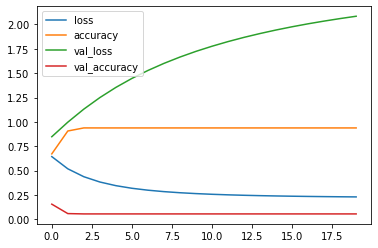

In [ ]:
pd.DataFrame(history.history).plot();